In [12]:
import numpy as np
import sympy
from sympy import Symbol
from sympy import Rational
import matplotlib.pyplot as plt
import csv

def evalfs(f, xs):
    values = []
    for x_ in xs:
        values.append(f.evalf(subs = {x:x_}))
    return np.array(values)

# 构造勒让德多项式，并存储在P中

In [13]:
max_n = 38
x = Symbol('x')
Lgd = [sympy.numer(1), x]

for i in range(2,max_n + 1):
    Lgd.append(sympy.simplify(Rational(2 * i - 1, i) * x * Lgd[i - 1] - Rational(i - 1, i) * Lgd[i - 2]))
for i in range(11):
    print(i, Lgd[i])

0 1
1 x
2 3*x**2/2 - 1/2
3 x*(5*x**2 - 3)/2
4 35*x**4/8 - 15*x**2/4 + 3/8
5 x*(63*x**4 - 70*x**2 + 15)/8
6 231*x**6/16 - 315*x**4/16 + 105*x**2/16 - 5/16
7 x*(429*x**6 - 693*x**4 + 315*x**2 - 35)/16
8 6435*x**8/128 - 3003*x**6/32 + 3465*x**4/64 - 315*x**2/32 + 35/128
9 x*(12155*x**8 - 25740*x**6 + 18018*x**4 - 4620*x**2 + 315)/128
10 46189*x**10/256 - 109395*x**8/256 + 45045*x**6/128 - 15015*x**4/128 + 3465*x**2/256 - 63/256


# 构造目标函数

In [14]:
f = sympy.exp(x)

# 计算勒让德多项式的模长

In [15]:
norm = []
for i in range(max_n + 1):
    norm.append(sympy.integrate(Lgd[i] ** 2, (x, -1, 1)))
print(norm)

[2, 2/3, 2/5, 2/7, 2/9, 2/11, 2/13, 2/15, 2/17, 2/19, 2/21, 2/23, 2/25, 2/27, 2/29, 2/31, 2/33, 2/35, 2/37, 2/39, 2/41, 2/43, 2/45, 2/47, 2/49, 2/51, 2/53, 2/55, 2/57, 2/59, 2/61, 2/63, 2/65, 2/67, 2/69, 2/71, 2/73, 2/75, 2/77]


# 计算f在以勒让德多项式为基的空间中的分量

In [16]:
#变量以Lgd_开头命名
Lgd_coef = []
for i in range(max_n + 1):
    Lgd_coef.append(sympy.integrate(f * Lgd[i], (x, -1, 1))/ norm[i])
print(Lgd_coef[0:11])

[-exp(-1)/2 + E/2, 3*exp(-1), -35*exp(-1)/2 + 5*E/2, -35*E/2 + 259*exp(-1)/2, -1197*exp(-1) + 162*E, -3619*E/2 + 26741*exp(-1)/2, -351091*exp(-1)/2 + 47515*E/2, -358830*E + 2651415*exp(-1), -90607229*exp(-1)/2 + 12262355*E/2, -233893781*E/2 + 1728254269*exp(-1)/2, -18202633113*exp(-1) + 2463458508*E]


# 由上面计算得出的系数构造最佳平方逼近多项式，以及其误差

In [17]:
P = []
epsilon_func = []

for i in range(max_n + 1):
    tmp_p = 0
    for j in range(i + 1):
        tmp_p += Lgd_coef[j] * Lgd[j]
    P.append(sympy.simplify(tmp_p))
    epsilon_func.append(sympy.simplify(f - P[i]))

for i in range(11):
    print(i, P[i], epsilon_func[i])

0 sinh(1) exp(x) - sinh(1)
1 (6*x - 1 + exp(2))*exp(-1)/2 (-6*x + 2*exp(x + 1) - exp(2) + 1)*exp(-1)/2
2 (12*x + 5*(-7 + exp(2))*(3*x**2 - 1) - 2 + 2*exp(2))*exp(-1)/4 (-12*x + 5*(7 - exp(2))*(3*x**2 - 1) + 4*exp(x + 1) - 2*exp(2) + 2)*exp(-1)/4
3 (-7*x*(-37 + 5*exp(2))*(5*x**2 - 3) + 12*x + 5*(-7 + exp(2))*(3*x**2 - 1) - 2 + 2*exp(2))*exp(-1)/4 (-7*x*(37 - 5*exp(2))*(5*x**2 - 3) - 12*x + 5*(7 - exp(2))*(3*x**2 - 1) + 4*exp(x + 1) - 2*exp(2) + 2)*exp(-1)/4
4 5*(-8379*x**4 + 1134*x**4*exp(2) - 70*x**3*exp(2) + 518*x**3 - 966*x**2*exp(2) + 7140*x**2 - 306*x + 42*x*exp(2) - 705 + 96*exp(2))*exp(-1)/8 (-5670*x**4*exp(2) + 41895*x**4 - 2590*x**3 + 350*x**3*exp(2) - 35700*x**2 + 4830*x**2*exp(2) - 210*x*exp(2) + 1530*x + 8*exp(x + 1) - 480*exp(2) + 3525)*exp(-1)/8
5 3*(-75999*x**5*exp(2) + 561561*x**5 - 27930*x**4 + 3780*x**4*exp(2) - 622230*x**3 + 84210*x**3*exp(2) - 3220*x**2*exp(2) + 23800*x**2 - 17955*x*exp(2) + 132685*x - 2350 + 320*exp(2))*exp(-1)/16 (-1684683*x**5 + 227997*x**5*exp(2)

# 画出误差曲线图像

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


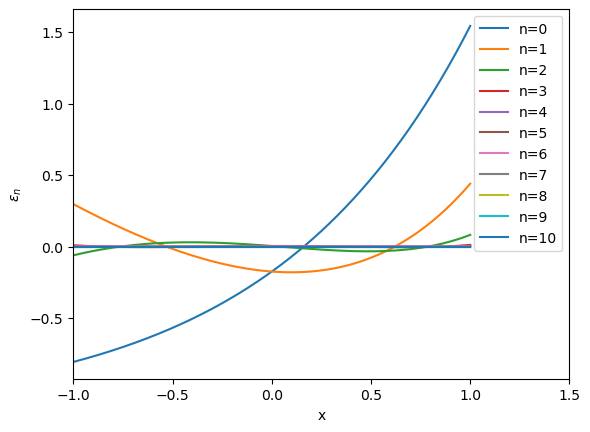

In [18]:
x_range = np.arange(-1, 1.01, 0.01)
epsilon_discret = []
for i in range(0, max_n + 1):
    epsilon_discret.append(evalfs(epsilon_func[i], x_range))

for i in range(11):
    plt.plot(x_range, epsilon_discret[i], label = "n=" + str(i))
plt.xlim(-1, 1.5)
plt.xlabel("x")
plt.ylabel("$\epsilon_n$")
plt.legend(loc='best')
plt.savefig("epsilon.eps", dpi=300,format='eps')
plt.show()

# 上面的计算得到的都是解析解，现在求数值解

In [19]:
P_float = []
epsilon_float = []
for i in range(max_n + 1):
    P_float.append(sympy.simplify(P[i].evalf()))
    epsilon_float.append(sympy.simplify(epsilon_func[i].evalf()))
for i in range(11):
    print(i, P_float[i], epsilon_float[i])

0 1.17520119364380 exp(x) - 1.1752011936438
1 1.10363832351433*x + 1.1752011936438 -1.10363832351433*x + 0.367879441171442*exp(x + 1) - 1.1752011936438
2 0.536721525971059*x**2 + 1.10363832351433*x + 0.996294018320115 -0.536721525971059*x**2 - 1.10363832351433*x + 0.367879441171442*exp(x + 1) - 0.996294018320115
3 0.176139084171224*x**3 + 0.536721525971059*x**2 + 0.997954873011593*x + 0.996294018320115 -0.176139084171224*x**3 - 0.536721525971059*x**2 - 0.997954873011593*x + 0.367879441171442*exp(x + 1) - 0.996294018320115
4 0.0435974356513095*x**4 + 0.176139084171224*x**3 + 0.499352295412685*x**2 + 0.997954873011593*x + 1.00003094137593 -0.0435974356513931*x**4 - 0.176139084171219*x**3 - 0.499352295412685*x**2 - 0.997954873011598*x + 0.367879441171442*exp(x + 1) - 1.00003094137594
5 0.00865924075198658*x**5 + 0.0435974356513931*x**4 + 0.166517705557217*x**3 + 0.499352295412769*x**2 + 1.00001659699943*x + 1.00003094137595 -0.0086592407493099*x**5 - 0.0435974356513931*x**4 - 0.1665177055

# 将数值解以latex公式形式给出

In [20]:
latex_formula = [["", "数值近似多项式", "数值误差", "近似多项式", "误差", "勒让德多项式"]]
for i in range(max_n + 1):
    latex_formula.append(["n=" + str(i),
                          sympy.latex(P_float[i]), sympy.latex(epsilon_float[i]),
                          sympy.latex(P[i]), sympy.latex(epsilon_func[i]),
                          sympy.latex(Lgd[i])])
with open('latex_formula.csv', 'w') as file:
    write = csv.writer(file)
    write.writerows(latex_formula)

# 画出误差图像并计算误差极值

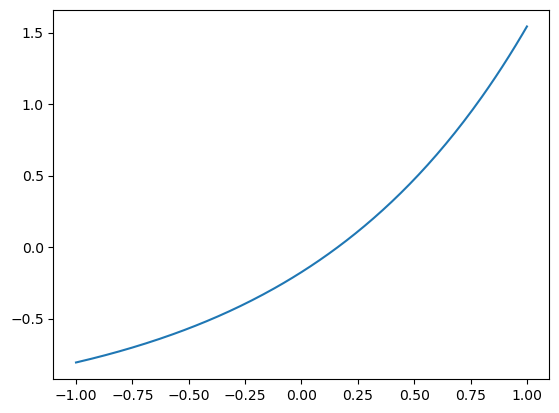

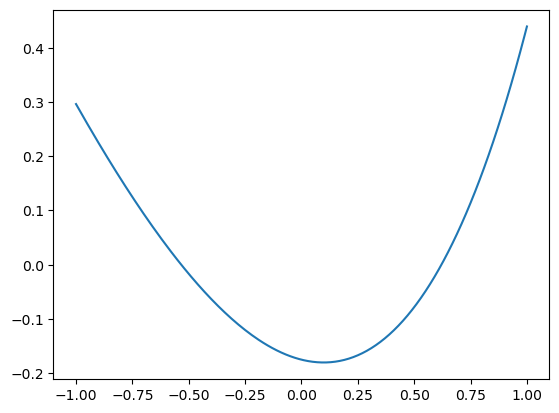

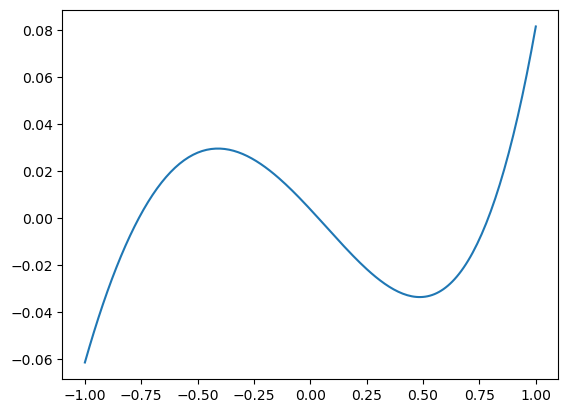

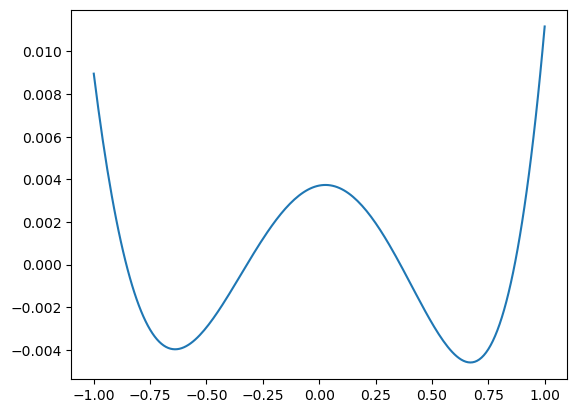

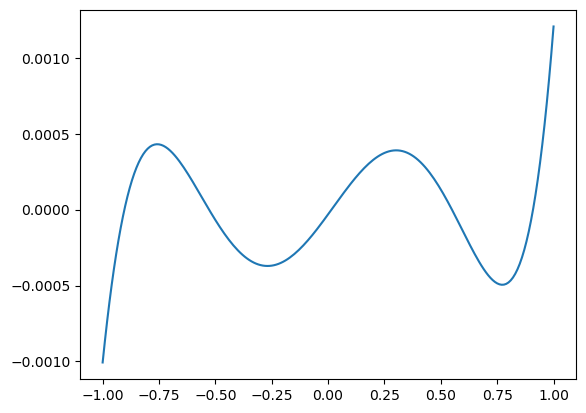

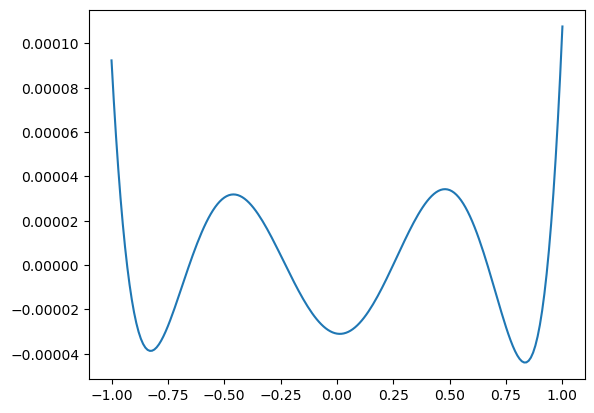

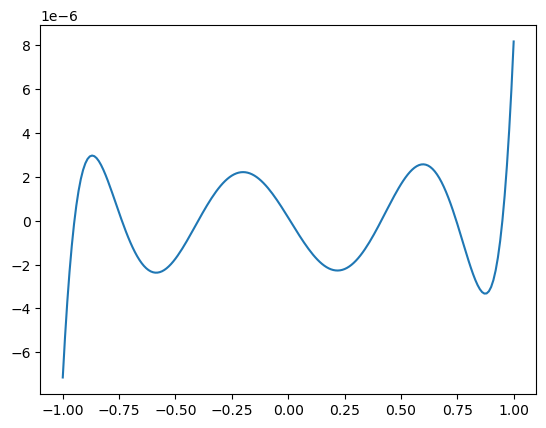

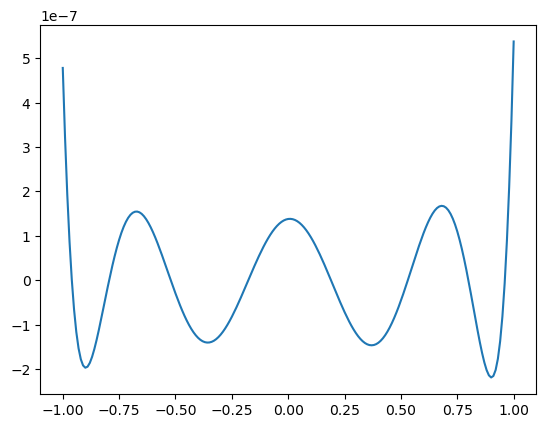

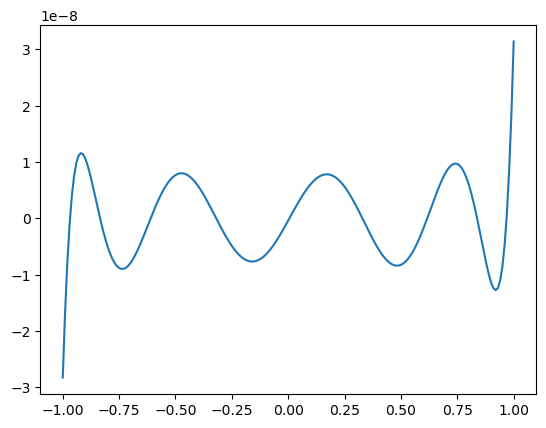

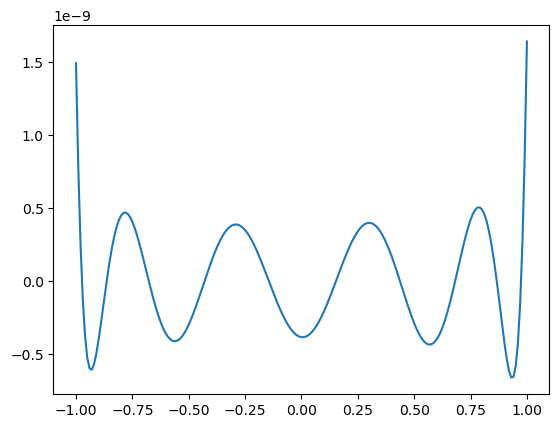

[200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200
 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200
 200 200 200]
[1.54308063481525 0.439442311300920 0.0816279606535453 0.0111723269850555
 0.00120719883618618 0.000107612708978642 8.15836986521376e-6
 5.37828556349682e-7 3.13565817845203e-8 1.63844062794245e-9
 7.75539826323836e-11]


In [21]:
for err in epsilon_discret[0: 10]:
    plt.plot(x_range, err)
    plt.show()
abs_error = np.abs(epsilon_discret)
extreme_point = np.argmax(abs_error, axis = 1)
print(extreme_point)
max_error = np.max(abs_error, axis=1)
print(max_error[0:11])

# 画出误差极值图像和极值对数图像

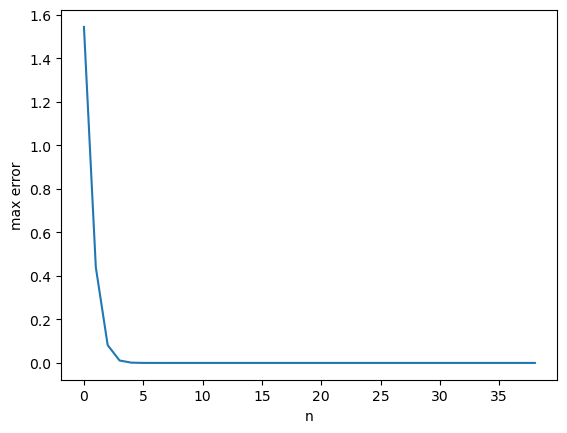

/var/folders/22/vljd7pts6hx7gvsntnkblyvm0000gn/T/ipykernel_89638/1587304975.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  log_error = np.log(np.array(max_error, dtype=np.float))


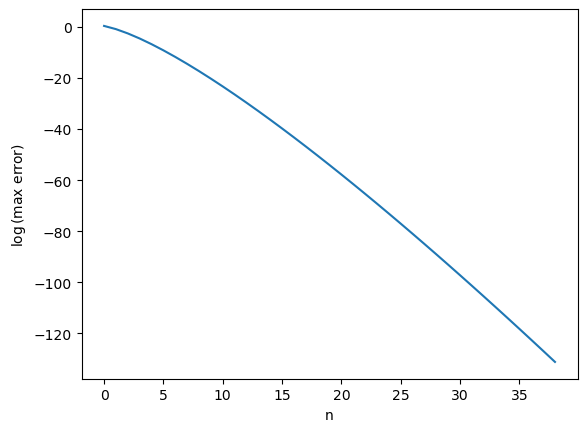

In [22]:
n = np.arange(0, max_n + 1)
plt.figure()
plt.plot(n, max_error)
plt.xlabel("n")
plt.ylabel("max error")
plt.savefig("max_error.eps", dpi = 300, format = "eps")
plt.show()

log_error = np.log(np.array(max_error, dtype=np.float))
plt.figure()
plt.plot(n, log_error)
plt.xlabel("n")
plt.ylabel("$\log$(max error)")
plt.savefig("log_error.eps", dpi = 300, format = "eps")
plt.show()

# 对对数误差进行最小二乘法线性回归

In [23]:
# 变量以lin_开头命名
start_n = 15
used_n = 10
lin_A = np.transpose([n, np.ones_like(n)])
lin_An = lin_A[start_n: start_n + used_n]
lin_ATA = np.matmul(np.transpose(lin_An), lin_An)
lin_ATB = np.matmul(np.transpose(lin_An), log_error[start_n: start_n + used_n])
lin_coef_error = np.matmul(np.linalg.inv(lin_ATA), lin_ATB)
print(lin_coef_error)

[-3.70952066 16.19660983]


# 画图

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


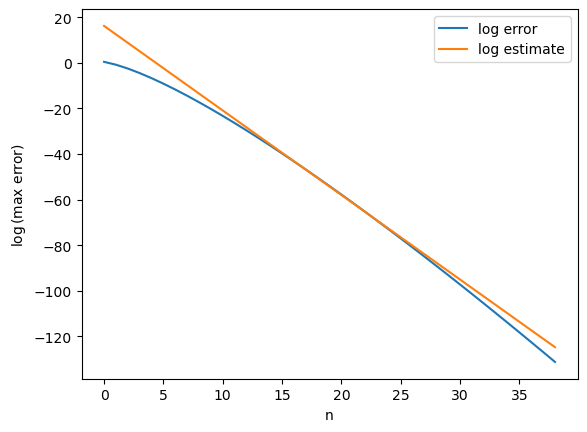

In [24]:
lin_log_error_est = np.matmul(lin_A, lin_coef_error)
plt.figure()
plt.plot(n, log_error, label = "log error")
plt.plot(n, lin_log_error_est, label = "log estimate")
plt.legend(loc = "best")
plt.xlabel("n")
plt.ylabel("$\log$(max error)")
plt.savefig("linear regression of logerror to n.eps", dpi = 300, format = "eps")
plt.show()

# log error和n的多项式回归
## 对log log error和log n线性回归估计n的指数

[0.24201356 1.27460408]


/var/folders/22/vljd7pts6hx7gvsntnkblyvm0000gn/T/ipykernel_89638/94953063.py:3: RuntimeWarning: divide by zero encountered in log
  deg_A = np.transpose([np.ones_like(n), np.log(n)])[25:35]
/var/folders/22/vljd7pts6hx7gvsntnkblyvm0000gn/T/ipykernel_89638/94953063.py:10: RuntimeWarning: divide by zero encountered in log
  deg_log_log_err_est = np.matmul(np.transpose([np.ones_like(n), np.log(n)]), deg_coef)
/var/folders/22/vljd7pts6hx7gvsntnkblyvm0000gn/T/ipykernel_89638/94953063.py:12: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(n)[log_error < 0], np.log(-log_error[log_error < 0]), label = "estimate log log error")
/var/folders/22/vljd7pts6hx7gvsntnkblyvm0000gn/T/ipykernel_89638/94953063.py:13: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(n), deg_log_log_err_est, label = "log log error")
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


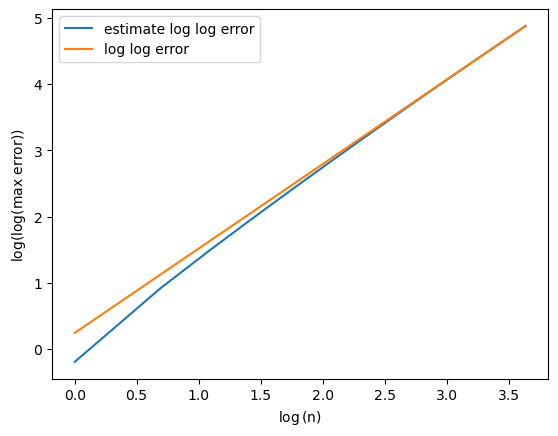

In [25]:
# 变量都以deg_开头命名
log_log_error = np.log(-log_error[25:35])
deg_A = np.transpose([np.ones_like(n), np.log(n)])[25:35]
deg_ATA = np.matmul(np.transpose(deg_A), deg_A)
deg_ATB = np.matmul(np.transpose(deg_A), log_log_error)
deg_coef = np.matmul(np.linalg.inv(deg_ATA), deg_ATB)
print(deg_coef)


deg_log_log_err_est = np.matmul(np.transpose([np.ones_like(n), np.log(n)]), deg_coef)
plt.figure()
plt.plot(np.log(n)[log_error < 0], np.log(-log_error[log_error < 0]), label = "estimate log log error")
plt.plot(np.log(n), deg_log_log_err_est, label = "log log error")
plt.legend(loc = "best")
plt.xlabel("$\log$(n)")
plt.ylabel("$\log(\log($max error$))$")
plt.savefig("linear regression of loglogerror to logn.eps", dpi = 300, format = "eps")
plt.show()

## 构造1.27次回归

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[-1.24294853 -0.19383365  1.89277257]


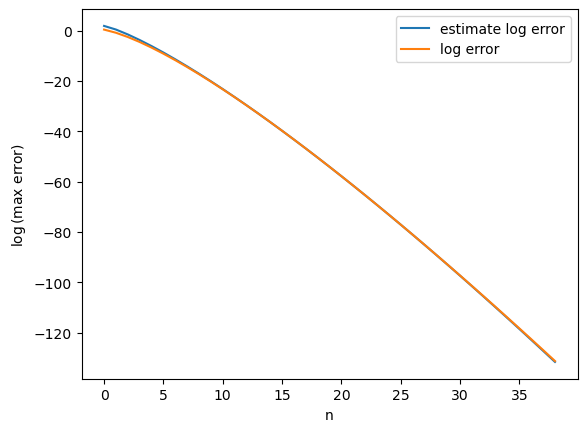

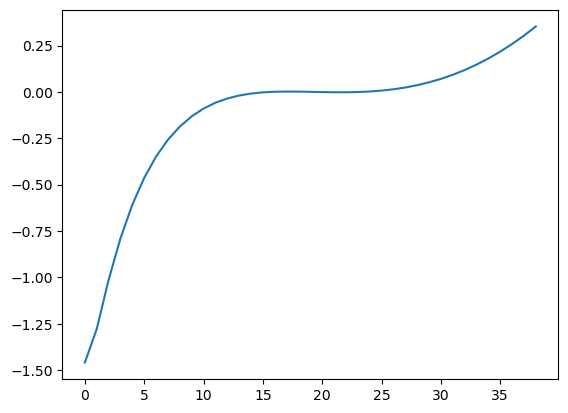

In [26]:
#变量以frac_poly_开头命名
frac_poly_A = [n ** 1.27, n, np.ones_like(n)]
frac_poly_A = np.transpose(frac_poly_A)
frac_poly_An = frac_poly_A[15:25]
frac_poly_ATA = np.matmul(np.transpose(frac_poly_An), frac_poly_An)
frac_poly_ATB = np.matmul(np.transpose(frac_poly_An), log_error[15:25])
frac_poly_coef = np.matmul(np.linalg.inv(frac_poly_ATA), frac_poly_ATB)
print(frac_poly_coef)

frac_poly_pred = np.matmul(frac_poly_A, frac_poly_coef)
plt.figure()
plt.plot(n, frac_poly_pred, label = "estimate log error")
plt.plot(n, log_error, label = "log error")
plt.xlabel("n")
plt.ylabel("$\log$(max error)")
plt.legend(loc = "best")
plt.savefig("1.27 deg regression of log error to n.eps", dpi = 300, format = "eps")
plt.show()
plt.figure()
plt.plot(n, log_error - frac_poly_pred)
plt.show()

# 对数误差关于$n\ln n$及$n$的回归

/var/folders/22/vljd7pts6hx7gvsntnkblyvm0000gn/T/ipykernel_89638/2306515761.py:2: RuntimeWarning: divide by zero encountered in log
  log_exp_A = [n * np.log(n), n, np.ones_like(n)]
/var/folders/22/vljd7pts6hx7gvsntnkblyvm0000gn/T/ipykernel_89638/2306515761.py:2: RuntimeWarning: invalid value encountered in multiply
  log_exp_A = [n * np.log(n), n, np.ones_like(n)]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[-0.94689516  0.04388085 -1.94601884]


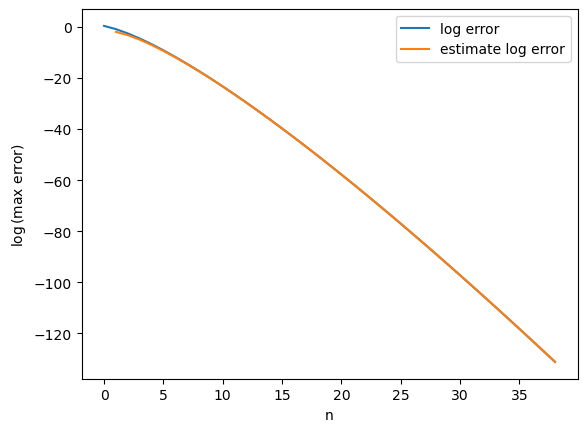

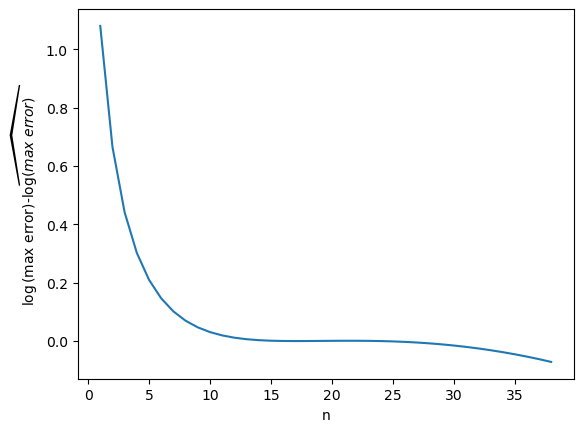

In [27]:
#变量以log_exp_开头命名
log_exp_A = [n * np.log(n), n, np.ones_like(n)]
log_exp_A = np.transpose(log_exp_A)
log_exp_An = log_exp_A[15:25]
log_exp_ATA = np.matmul(np.transpose(log_exp_An), log_exp_An)
log_exp_ATB = np.matmul(np.transpose(log_exp_An), log_error[15:25])
log_exp_coef = np.matmul(np.linalg.inv(log_exp_ATA), log_exp_ATB)
print(log_exp_coef)

log_exp_pred = np.matmul(log_exp_A, log_exp_coef)
plt.figure()
plt.plot(n, log_error, label = "log error")
plt.plot(n, log_exp_pred, label = "estimate log error")
plt.legend(loc = "best")
plt.savefig("linear regression of log error to nlnn and n.eps", dpi = 300, format = "eps")
plt.xlabel("n")
plt.ylabel("$\log$(max error)")
plt.show()
plt.figure()
plt.plot(n, log_error - log_exp_pred)
plt.xlabel("n")
plt.ylabel("$\log$(max error)-$\widehat{\log(max\ error)}$")
plt.show()